sys.version_info(major=3, minor=8, micro=16, releaselevel='final', serial=0)


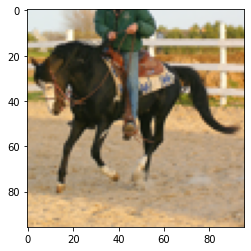

Streaming output truncated to the last 5000 lines.
./img_test/5/3000
./img_test/5/3001
./img_test/10/3002
./img_test/5/3003
./img_test/6/3004
./img_test/1/3005
./img_test/7/3006
./img_test/3/3007
./img_test/6/3008
./img_test/9/3009
./img_test/8/3010
./img_test/7/3011
./img_test/5/3012
./img_test/2/3013
./img_test/10/3014
./img_test/9/3015
./img_test/3/3016
./img_test/5/3017
./img_test/3/3018
./img_test/10/3019
./img_test/3/3020
./img_test/8/3021
./img_test/1/3022
./img_test/4/3023
./img_test/3/3024
./img_test/1/3025
./img_test/7/3026
./img_test/6/3027
./img_test/4/3028
./img_test/8/3029
./img_test/9/3030
./img_test/5/3031
./img_test/8/3032
./img_test/2/3033
./img_test/5/3034
./img_test/2/3035
./img_test/3/3036
./img_test/8/3037
./img_test/2/3038
./img_test/4/3039
./img_test/8/3040
./img_test/3/3041
./img_test/5/3042
./img_test/5/3043
./img_test/8/3044
./img_test/8/3045
./img_test/7/3046
./img_test/1/3047
./img_test/3/3048
./img_test/4/3049
./img_test/2/3050
./img_test/1/3051
./img_test

In [ ]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/test_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/test_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img_test/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    
if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

    # save images to disk
    save_images(images, labels)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
size=28
DATADIR="/content/img"#pass of train image
DATADIR1="/content/img_test"#pass of test and validat image
CATEGORIES=["1","2","3","4","5","6","7","8","9","10"]
# for category in CATEGORIES:
#     path=os.path.join(DATADIR,category)
#     for img in os.listdir(path):
#         img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array,cmap="gray")
#         plt.show()
#         break
#     break

In [ ]:
traning_data = []#create training data
def create_training_data():
    for cate in CATEGORIES:
        path = os.path.join(DATADIR, cate)
        class_num = CATEGORIES.index(cate)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size,size))
                traning_data.append([new_array , class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
test_data = []#create test and valid data
valid_data = [] 
def create_testing_data():
  for cate in CATEGORIES:
    path = os.path.join(DATADIR1,cate)
    class_num = CATEGORIES.index(cate)
    cnt=0
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (size,size))
        if cnt <200:
          traning_data.append([new_array , class_num])
        elif cnt >=500:
          valid_data.append([new_array , class_num])
        else:
          test_data.append([new_array , class_num])
        #traning_data.append([new_array , class_num])
        cnt=cnt+1
      except Exception as e:
        pass
create_testing_data()

In [ ]:
print(len(traning_data))

7000


In [ ]:
X_train = []#feature ->X
y_train = []#label   ->y
X_valid = []
y_valid = []
X_test = []
y_test = []
import random 
random.shuffle(traning_data)
random.shuffle(test_data)
random.shuffle(valid_data)
def stor(x,y,z):
  for feature, label in z:
    x.append(feature)
    y.append(label)
stor(X_train,y_train,traning_data)
stor(X_valid,y_valid,valid_data)
stor(X_test,y_test,test_data)
#converting to array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test) 
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.#normalize

In [ ]:
class_names = ["airplane", "bird", "car", "cat", "deer",
               "dog", "horse", "monkey", "ship", "truck"]
X_test.shape

(3000, 28, 28)

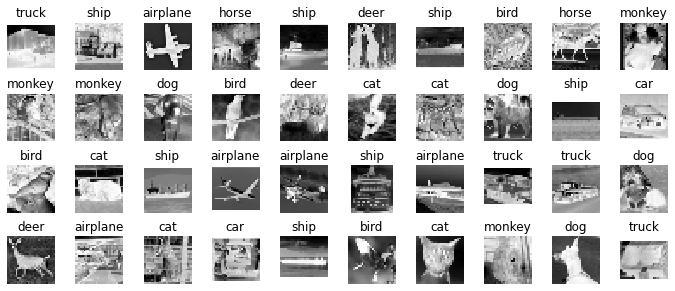

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

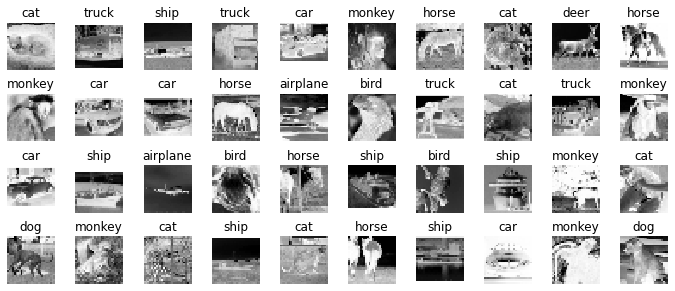

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_valid[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_valid[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

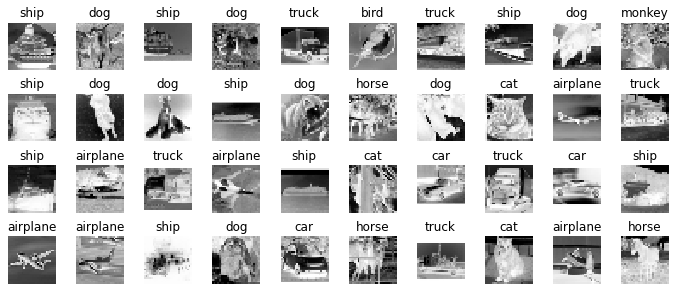

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[size, size]))
model.add(keras.layers.Dense(300, activation="relu"))#hidden
model.add(keras.layers.Dense(100, activation="relu"))#hidden
model.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)
# model=Sequential()

# model.add(Conv2D(64,(3,3),input_shape=(size,size,1)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(  Conv2D(64,(3,3))  )
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(10))
# model.add(Activation('sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train,y_train,
                    batch_size = 4,
                    epochs=30,
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/30
1750/1750 [==============================] - 6s 4ms/step - loss: 1.4655 - accuracy: 0.4951 - val_loss: 2.1040 - val_accuracy: 0.3470
Epoch 2/30
1750/1750 [==============================] - 6s 3ms/step - loss: 1.1548 - accuracy: 0.5784 - val_loss: 2.2384 - val_accuracy: 0.3650
Epoch 3/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.9992 - accuracy: 0.6383 - val_loss: 2.1549 - val_accuracy: 0.3703
Epoch 4/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.9092 - accuracy: 0.6681 - val_loss: 2.2975 - val_accuracy: 0.3520
Epoch 5/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.8531 - accuracy: 0.6880 - val_loss: 2.4711 - val_accuracy: 0.3713
Epoch 6/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.7758 - accuracy: 0.7213 - val_loss: 2.6177 - val_accuracy: 0.3470
Epoch 7/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.7310 - accuracy: 0.7394 - val_loss: 2.4799 - val_accuracy:

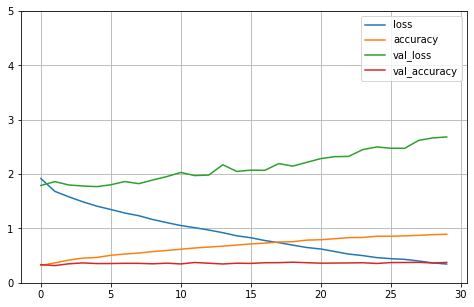

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 2.1697 - accuracy: 0.3737


[2.1697423458099365, 0.3736666738986969]

In [ ]:
X_new = X_test[:12]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 57ms/step


array([[0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.46],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.63],
       [0.19, 0.09, 0.  , 0.27, 0.14, 0.15, 0.01, 0.02, 0.13, 0.  ],
       [0.44, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.06],
       [0.02, 0.  , 0.71, 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.21],
       [0.  , 0.3 , 0.  , 0.2 , 0.05, 0.05, 0.17, 0.21, 0.01, 0.  ],
       [0.18, 0.39, 0.  , 0.08, 0.07, 0.13, 0.01, 0.01, 0.13, 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.01, 0.  , 0.7 , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.01],
       [0.39, 0.02, 0.  , 0.08, 0.03, 0.01, 0.  , 0.  , 0.46, 0.  ],
       [0.01, 0.03, 0.  , 0.42, 0.12, 0.35, 0.  , 0.05, 0.02, 0.  ],
       [0.03, 0.02, 0.03, 0.02, 0.06, 0.31, 0.51, 0.01, 0.  , 0.  ]],
      dtype=float32)

In [ ]:
predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 19ms/step


array([9, 9, 3, 8, 2, 1, 1, 8, 8, 8, 3, 6])

In [ ]:
np.array(class_names)[classes_x]


array(['truck', 'truck', 'cat', 'ship', 'car', 'bird', 'bird', 'ship',
       'ship', 'ship', 'cat', 'horse'], dtype='<U8')

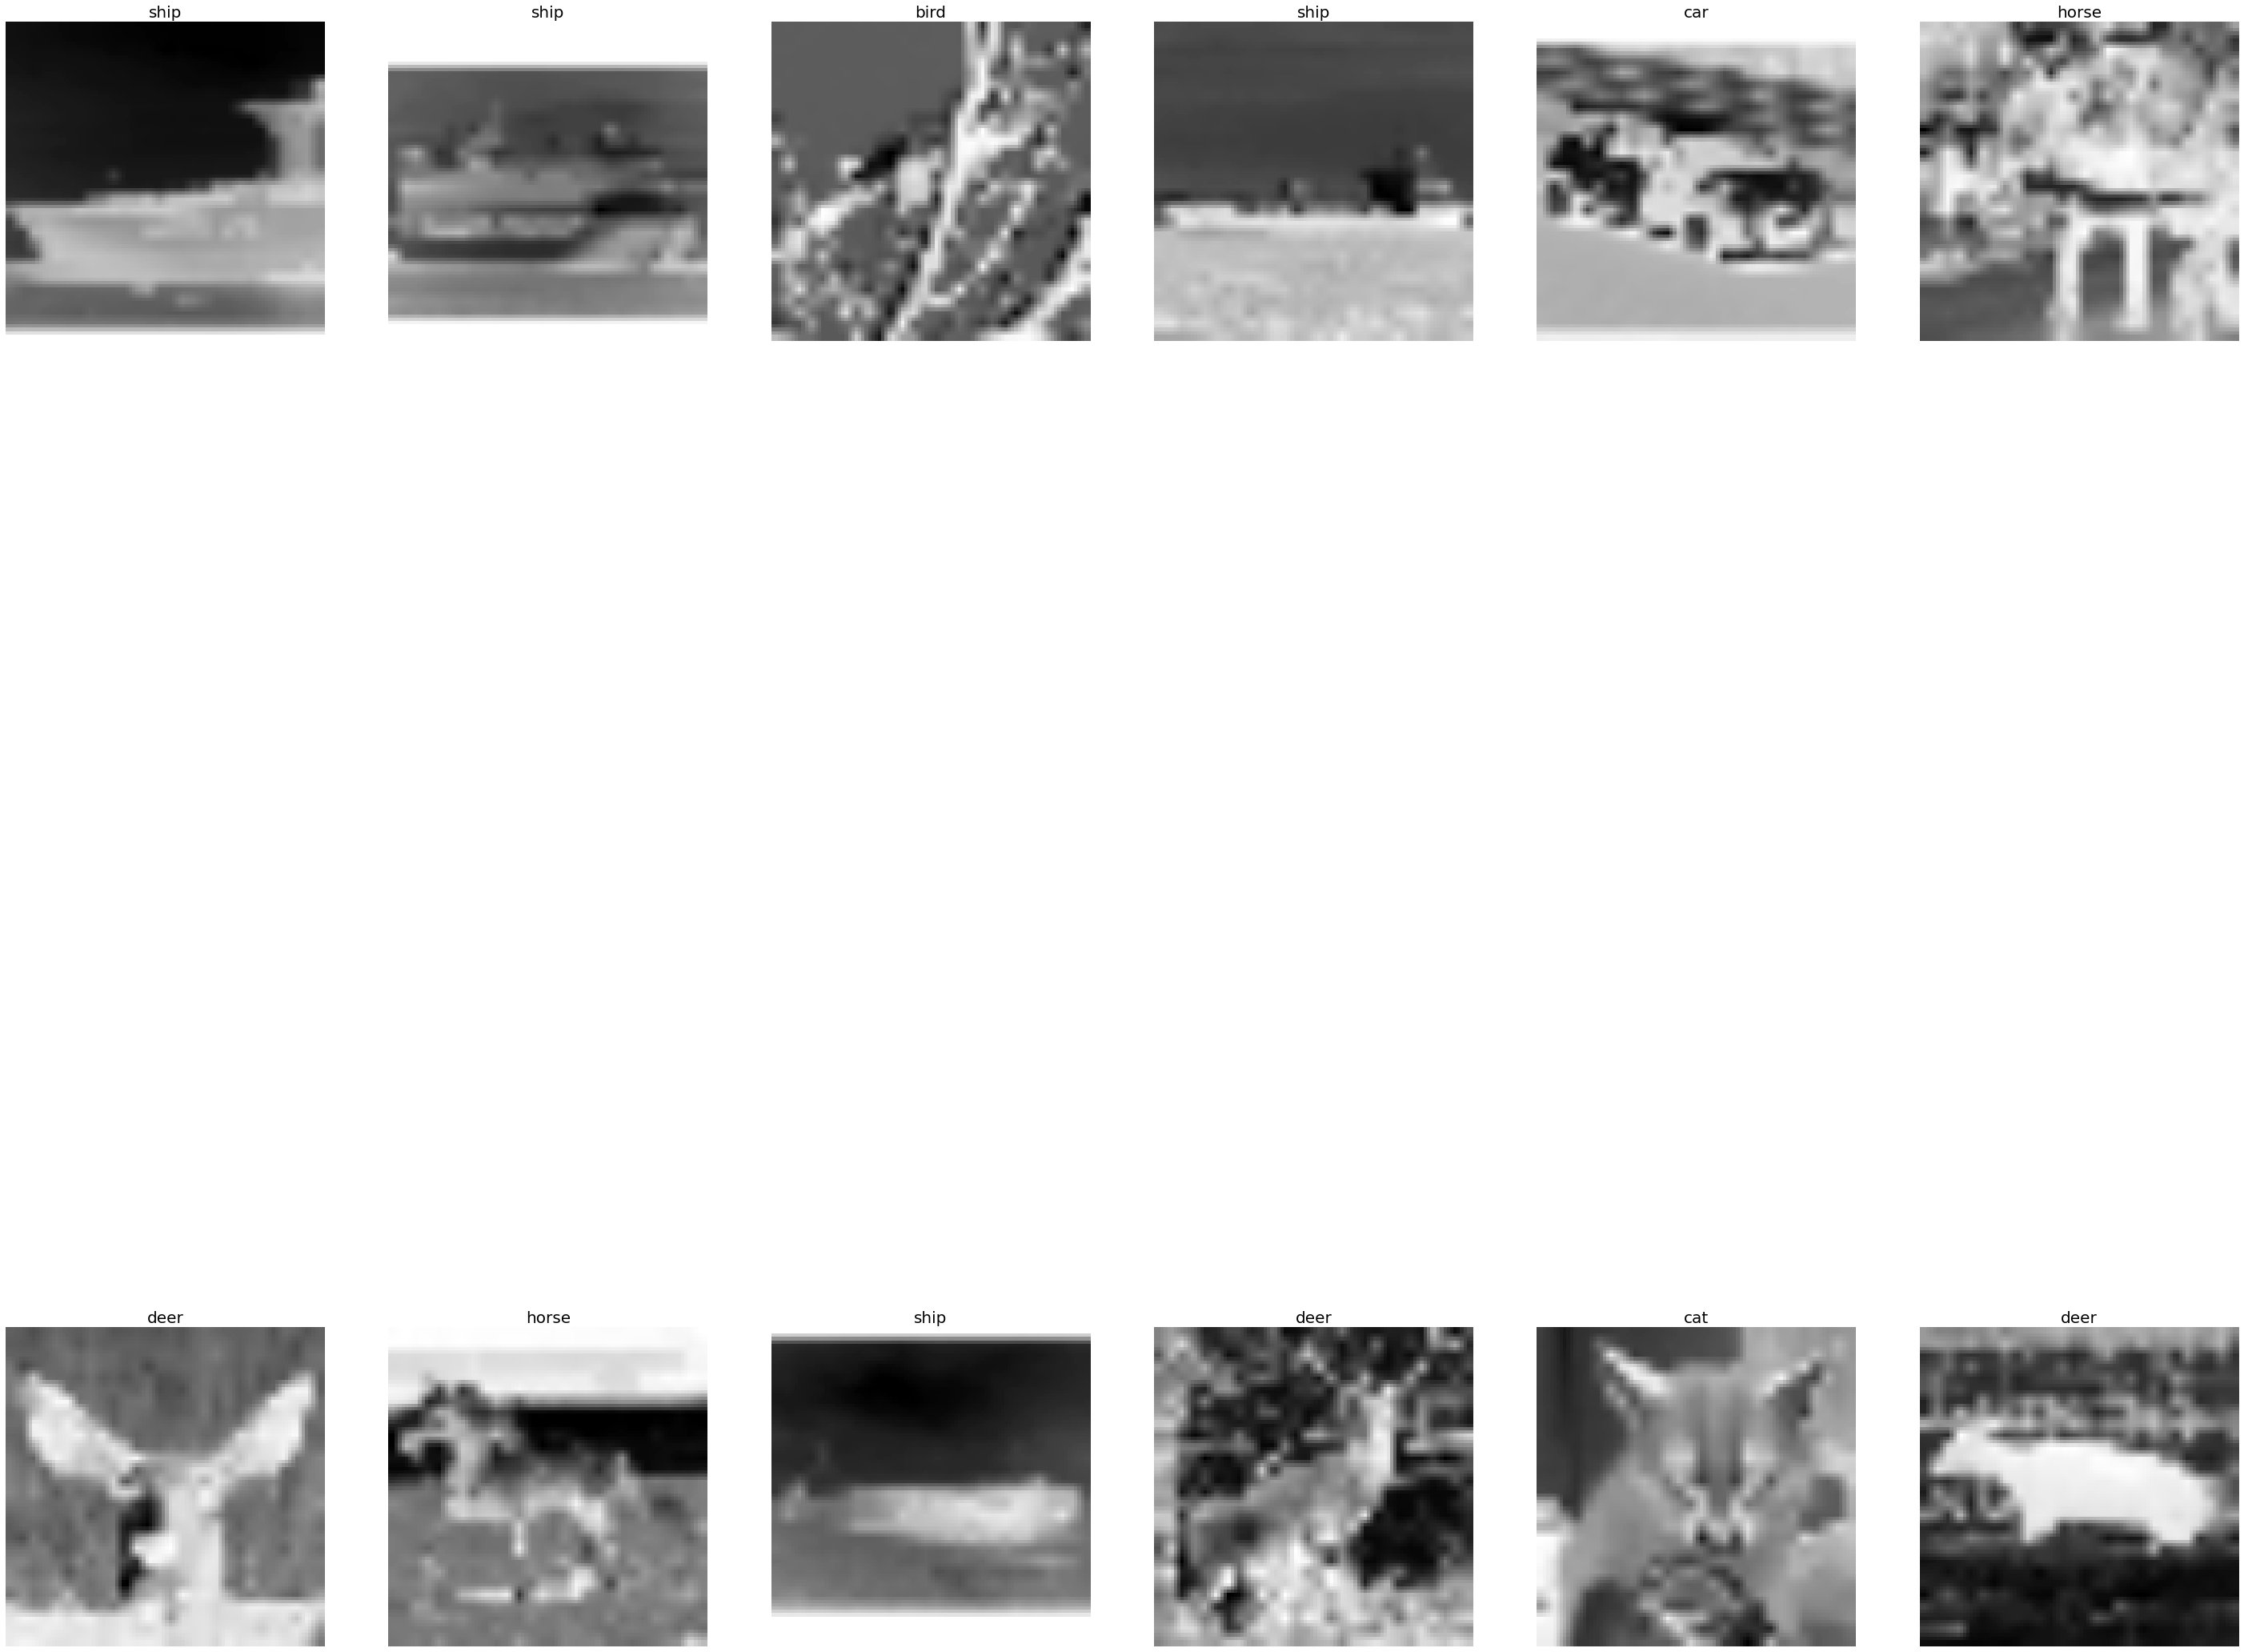

In [ ]:
y_new = y_test[:12]
plt.figure(figsize=(5*10, 5*10))
for index, image in enumerate(X_new):
    plt.subplot(2, 6, index + 1)
    image = cv2.resize(image,(96,96))
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title="confusion_matrix",
                          cmap=plt.cm.Blues):
    
    #############___check_normalization__#################
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
        
    else:
        print("Confusion matrix without normalization")
    ################################################
    
    print(cm)#print the confsion matrix as 2d array
    
    
    ####################__plotting_the matrix___###############
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ###########################################################
    
    tick_marks=np.arange(len(classes))
    
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='0.2f' if normalize else 'd'
    thresh=cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color="white"if cm[i,j]>thresh else "Black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()
    

94/94 [==============================] - 1s 5ms/step
Confusion matrix without normalization
[[102  20  11   1  43   2  38  14  49  20]
 [ 10  94   3  12  53  11  39  66   5   7]
 [  8   3 145   9   4   0  12   9  53  57]
 [ 12  32   5  44  38  18  58  74   8  11]
 [ 18  35   9  12 105   3  69  30  11   8]
 [  9  47   4  24  32  18  93  64   2   7]
 [  6  25  12   8  20   9 160  50   0  10]
 [  3  31   7  17  35  12  45 136   8   6]
 [ 15   5  30   4  15   2   8  12 178  31]
 [ 14   2  52   7   4   4  14  16  72 115]]


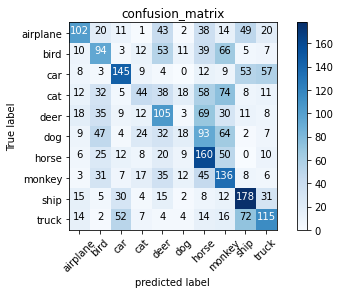

In [ ]:
p_test=model.predict(X_test).argmax(axis=1)

cm=confusion_matrix(y_test,p_test)

plot_confusion_matrix(cm,class_names)